In [1]:
pip install tensorflow

In [2]:
import os
import json

In [4]:
kaggle_credentails = json.load(open("kaggle (1).json"))

In [5]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [6]:
!kaggle datasets download ameencaslam/3body-filtered-v2-10k

Dataset URL: https://www.kaggle.com/datasets/ameencaslam/3body-filtered-v2-10k
License(s): unknown


In [7]:
import zipfile
import os

# Define paths
zip_file_path = "/content/3body-filtered-v2-10k.zip"  # Change to your actual file path
extract_folder = "/content/extracted_folder"  # Folder where files will be extracted

# Ensure the extraction folder exists
os.makedirs(extract_folder, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:  # ✅ Ensure zipfile.ZipFile is used
    zip_ref.extractall(extract_folder)

print("Extraction completed. Extracted files:", os.listdir(extract_folder))

Extraction completed. Extracted files: ['real', 'fake']


In [8]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNet, DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess data
data_dir = '/content/extracted_folder'  # Replace with the path to your dataset
img_size = (224, 224)
batch_size = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# No augmentation for validation
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


Sample images from training set:


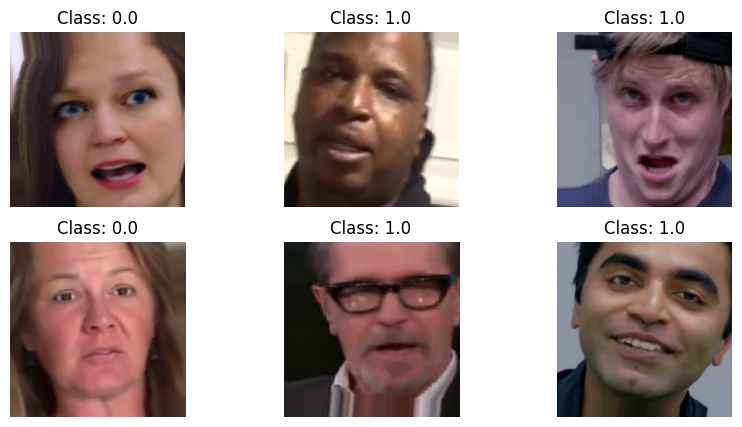

In [11]:
# Add this before training
print("Sample images from training set:")
x, y = next(train_generator)
plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x[i])
    plt.title(f"Class: {y[i]}")
    plt.axis('off')
plt.show()

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Class indices: {'fake': 0, 'real': 1}
Training samples: 16000, Validation samples: 4000
Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 858ms/step - accuracy: 0.5730 - loss: 0.8423 - precision: 0.5719 - recall: 0.5484

250/250 ━━━━━━━━━━━━━━━━━━━━ 264s 954ms/step - accuracy: 0.5731 - loss: 0.8421 - precision: 0.5720 - recall: 0.5485 - val_accuracy: 0.5345 - val_loss: 0.6996 - val_precision: 0.5443 - val_recall: 0.4235 - learning_rate: 3.0000e-04
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 231s 922ms/step - accuracy: 0.6417 - loss: 0.6987 - precision: 0.6481 - recall: 0.6274 - val_accuracy: 0.5270 - val_loss: 0.7660 - val_precision: 0.5590 - val_recall: 0.2560 - learning_rate: 3.0000e-04
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 865ms/step - accuracy: 0.6820 - loss: 0.6316 - precision: 0.6851 - recall: 0.6620

250/250 ━━━━━━━━━━━━━━━━━━━━ 234s 937ms/step - accuracy: 0.6821 - loss: 0.6315 - precision: 0.6852 - recall: 0.6621 - val_accuracy: 0.6158 - val_loss: 0.6794 - val_precision: 0.6804 - val_recall: 0.4365 - learning_rate: 3.0000e-04
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 864ms/step - accuracy: 0.7188 - loss: 0.5637 - precision: 0.7298 - recall: 0.6985

250/250 ━━━━━━━━━━━━━━━━━━━━ 235s 941ms/step - accuracy: 0.7188 - loss: 0.5636 - precision: 0.7299 - recall: 0.6986 - val_accuracy: 0.7713 - val_loss: 0.4769 - val_precision: 0.8310 - val_recall: 0.6810 - learning_rate: 3.0000e-04
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 869ms/step - accuracy: 0.7772 - loss: 0.4735 - precision: 0.7872 - recall: 0.7567

250/250 ━━━━━━━━━━━━━━━━━━━━ 232s 927ms/step - accuracy: 0.7772 - loss: 0.4734 - precision: 0.7872 - recall: 0.7567 - val_accuracy: 0.8225 - val_loss: 0.4034 - val_precision: 0.8707 - val_recall: 0.7575 - learning_rate: 3.0000e-04
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 228s 913ms/step - accuracy: 0.8050 - loss: 0.4271 - precision: 0.8105 - recall: 0.7962 - val_accuracy: 0.7567 - val_loss: 0.5014 - val_precision: 0.6979 - val_recall: 0.9055 - learning_rate: 3.0000e-04
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 230s 918ms/step - accuracy: 0.8262 - loss: 0.3864 - precision: 0.8319 - recall: 0.8164 - val_accuracy: 0.7800 - val_loss: 0.4602 - val_precision: 0.7288 - val_recall: 0.8920 - learning_rate: 3.0000e-04
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 237s 947ms/step - accuracy: 0.8448 - loss: 0.3631 - precision: 0.8460 - recall: 0.8371 - val_accuracy: 0.7097 - val_loss: 0.6746 - val_precision: 0.6377 - val_recall: 0.9715 - learning_rate: 3.0000e-04
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 

250/250 ━━━━━━━━━━━━━━━━━━━━ 235s 938ms/step - accuracy: 0.8732 - loss: 0.2990 - precision: 0.8782 - recall: 0.8638 - val_accuracy: 0.8790 - val_loss: 0.2884 - val_precision: 0.8738 - val_recall: 0.8860 - learning_rate: 1.5000e-04
Epoch 10/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 228s 912ms/step - accuracy: 0.8873 - loss: 0.2746 - precision: 0.8930 - recall: 0.8831 - val_accuracy: 0.8278 - val_loss: 0.4361 - val_precision: 0.7578 - val_recall: 0.9635 - learning_rate: 1.5000e-04
Epoch 11/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 861ms/step - accuracy: 0.8924 - loss: 0.2606 - precision: 0.8914 - recall: 0.8904

250/250 ━━━━━━━━━━━━━━━━━━━━ 268s 934ms/step - accuracy: 0.8924 - loss: 0.2606 - precision: 0.8914 - recall: 0.8904 - val_accuracy: 0.9112 - val_loss: 0.2220 - val_precision: 0.9373 - val_recall: 0.8815 - learning_rate: 1.5000e-04
Epoch 12/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 257s 914ms/step - accuracy: 0.8973 - loss: 0.2510 - precision: 0.8967 - recall: 0.8964 - val_accuracy: 0.8823 - val_loss: 0.2900 - val_precision: 0.8305 - val_recall: 0.9605 - learning_rate: 1.5000e-04
Epoch 13/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 865ms/step - accuracy: 0.9052 - loss: 0.2276 - precision: 0.9078 - recall: 0.9029

250/250 ━━━━━━━━━━━━━━━━━━━━ 235s 939ms/step - accuracy: 0.9052 - loss: 0.2276 - precision: 0.9078 - recall: 0.9029 - val_accuracy: 0.9137 - val_loss: 0.2149 - val_precision: 0.9156 - val_recall: 0.9115 - learning_rate: 1.5000e-04
Epoch 14/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 227s 907ms/step - accuracy: 0.9094 - loss: 0.2310 - precision: 0.9126 - recall: 0.9056 - val_accuracy: 0.8878 - val_loss: 0.2702 - val_precision: 0.8501 - val_recall: 0.9415 - learning_rate: 1.5000e-04
Epoch 15/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 228s 912ms/step - accuracy: 0.9126 - loss: 0.2186 - precision: 0.9167 - recall: 0.9078 - val_accuracy: 0.8910 - val_loss: 0.2649 - val_precision: 0.8469 - val_recall: 0.9545 - learning_rate: 1.5000e-04
Epoch 16/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 863ms/step - accuracy: 0.9205 - loss: 0.1992 - precision: 0.9285 - recall: 0.9126

250/250 ━━━━━━━━━━━━━━━━━━━━ 235s 939ms/step - accuracy: 0.9205 - loss: 0.1993 - precision: 0.9284 - recall: 0.9127 - val_accuracy: 0.9200 - val_loss: 0.2013 - val_precision: 0.9196 - val_recall: 0.9205 - learning_rate: 1.5000e-04
Epoch 17/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 228s 911ms/step - accuracy: 0.9239 - loss: 0.1957 - precision: 0.9271 - recall: 0.9196 - val_accuracy: 0.9080 - val_loss: 0.2248 - val_precision: 0.8795 - val_recall: 0.9455 - learning_rate: 1.5000e-04
Epoch 18/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 228s 911ms/step - accuracy: 0.9280 - loss: 0.1851 - precision: 0.9312 - recall: 0.9246 - val_accuracy: 0.9095 - val_loss: 0.2303 - val_precision: 0.8736 - val_recall: 0.9575 - learning_rate: 1.5000e-04
Epoch 19/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 863ms/step - accuracy: 0.9354 - loss: 0.1674 - precision: 0.9353 - recall: 0.9350

250/250 ━━━━━━━━━━━━━━━━━━━━ 234s 936ms/step - accuracy: 0.9354 - loss: 0.1674 - precision: 0.9353 - recall: 0.9349 - val_accuracy: 0.9240 - val_loss: 0.2002 - val_precision: 0.9004 - val_recall: 0.9535 - learning_rate: 1.5000e-04
Epoch 20/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 227s 907ms/step - accuracy: 0.9339 - loss: 0.1664 - precision: 0.9334 - recall: 0.9324 - val_accuracy: 0.9122 - val_loss: 0.2261 - val_precision: 0.8716 - val_recall: 0.9670 - learning_rate: 1.5000e-04


63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 203ms/step - accuracy: 0.9029 - loss: 0.2515 - precision: 0.3914 - recall: 0.4900

Final Validation Metrics:
Accuracy: 92.40%
Precision: 90.04%
Recall: 95.35%


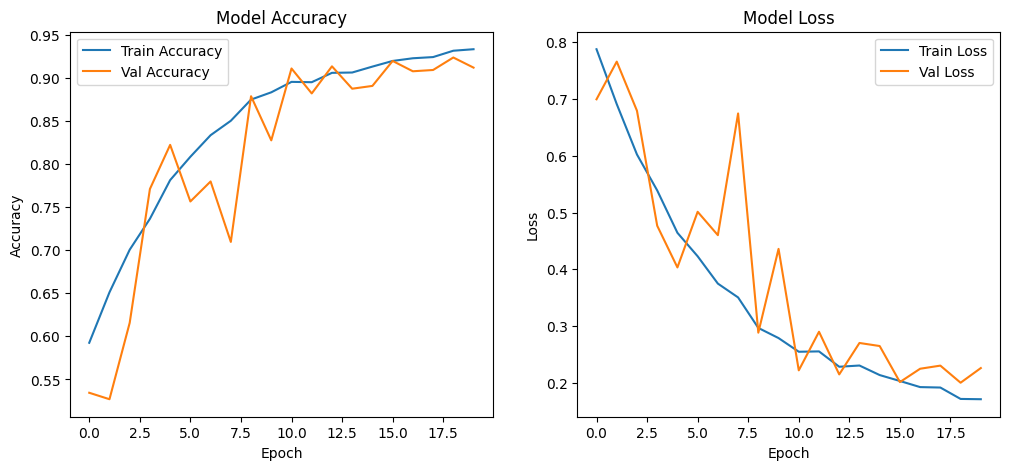

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt

# Data preparation
data_dir = '/content/extracted_folder'  # Confirm this is your correct path
img_size = (224, 224)
batch_size = 64  # Increased for faster training

# Optimized augmentation - less aggressive than before
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=8,  # Reduced from 15
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Data generators
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# Verify dataset
print("Class indices:", train_generator.class_indices)
print(f"Training samples: {train_generator.samples}, Validation samples: {val_generator.samples}")

# Enhanced model architecture
def create_enhanced_model():
    model = Sequential([
        # Block 1
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224,224,3)),
        BatchNormalization(),
        Conv2D(32, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.25),

        # Block 2
        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.35),

        # Block 3
        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.4),

        # Classifier
        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0003),  # Adjusted learning rate
                loss='binary_crossentropy',
                metrics=['accuracy',
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')])
    return model

model = create_enhanced_model()

# Improved callbacks
callbacks = [
    ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6),
    EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True, mode='max', baseline=0.75)
]

# Training with more epochs
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,  # Increased maximum epochs
    callbacks=callbacks,
    verbose=1
)

# Load best model
model = tf.keras.models.load_model('best_model.h5')

# Evaluation
val_loss, val_acc, val_prec, val_rec = model.evaluate(val_generator)
print(f"\nFinal Validation Metrics:")
print(f"Accuracy: {val_acc:.2%}")
print(f"Precision: {val_prec:.2%}")
print(f"Recall: {val_rec:.2%}")

# Plotting
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


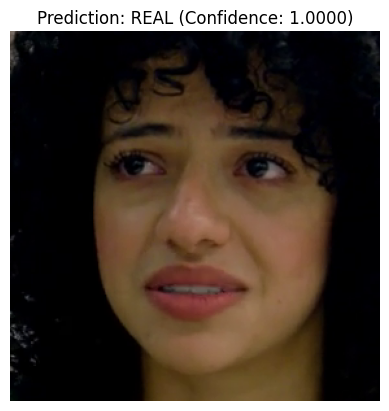

Prediction: REAL
Confidence: 1.0000


In [15]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the pre-trained model
model_path = '/content/best_model.h5'  # Replace with the path to your saved model
model = tf.keras.models.load_model(model_path)

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    return img_array

# Function to predict if the image is real or fake
def predict_image(img_path):
    # Preprocess the image
    img_array = preprocess_image(img_path)

    # Make prediction
    prediction = model.predict(img_array)
    confidence = prediction[0][0]  # Confidence score (0 = fake, 1 = real)

    # Determine if the image is real or fake
    if confidence > 0.5:
        result = "REAL"
    else:
        result = "FAKE"

    # Display the image and prediction
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {result} (Confidence: {confidence:.4f})")
    plt.show()

    return result, confidence

# Path to the image you want to predict
image_path = '/content/Real_4.png'  # Replace with the path to your image

# Predict the image
result, confidence = predict_image(image_path)
print(f"Prediction: {result}")
print(f"Confidence: {confidence:.4f}")